<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

El propósito de este cuaderno es explorar el modelo de regresión lineal discutido en el Capítulo 2 del libro.

Trabaja a través de las siguientes celdas, ejecutando cada una en orden. En varios lugares verás la palabra "TODO". Sigue las instrucciones en esos puntos y escribe código para completar las funciones. También hay preguntas intercaladas en el texto.

Contáctame en udlbookmail@gmail.com si encuentras algún error o tienes sugerencias.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [2]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [15]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  # Ans: TODO
  y = phi0 + phi1 * x
  # END: TODO

  return y

In [16]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

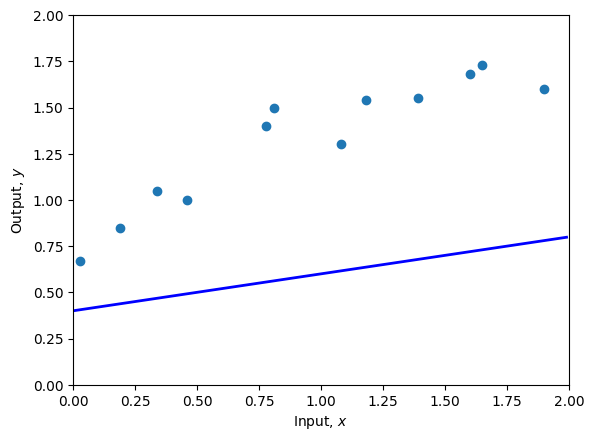

In [17]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [19]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)
  # Ans: TODO
  loss = np.sum(   ( f(x, phi0, phi1) - y    ) **2 )
  # END: TODO

  return loss

In [20]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


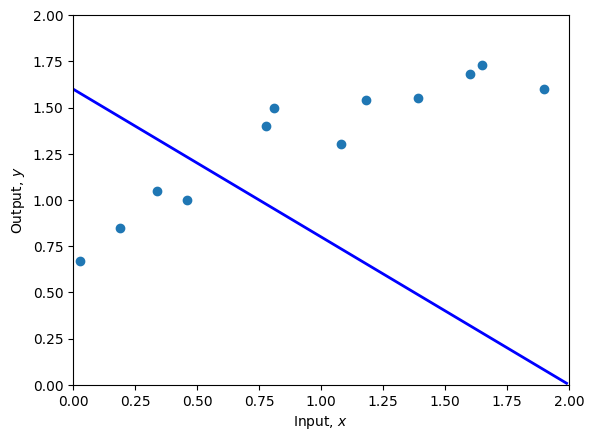

Your Loss = 10.28, Ground truth =10.28


In [21]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

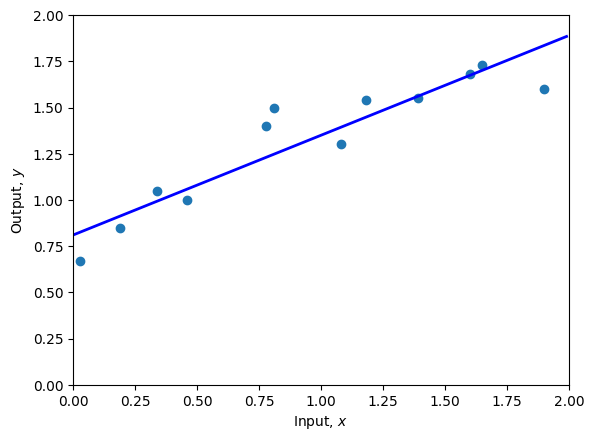

Your Loss = 0.20


In [ ]:
# TODO -- Cambia los parámetros manualmente para ajustar el modelo
# Primero, fija phi1 y prueba cambiando phi0 hasta que no puedas reducir más la pérdida
# Luego, fija phi0 y prueba cambiando phi1 hasta que no puedas reducir más la pérdida
# Repite este proceso hasta encontrar un conjunto de parámetros que ajusten el modelo como en la figura 2.2d
# Puedes hacer esto manualmente o, si quieres ir más allá, escribir código para hacer el descenso automáticamente
# Comienza con estos valores:

phi0 = .81 ; phi1 =0.54

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

Optimal phi0: 0.8185296893375276, Optimal phi1: 0.5287313453378689


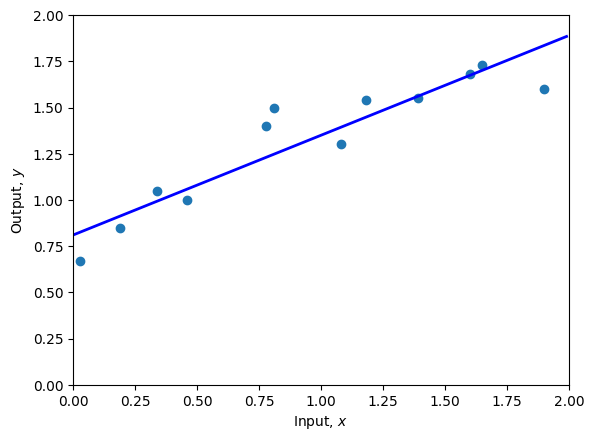

Your Loss = 0.20


In [36]:

def compute_gradients(x, y, phi0, phi1):
    N = len(x)
    dL_dphi0 = (2 / N) * np.sum(f(x, phi0, phi1) - y)
    dL_dphi1 = (2 / N) * np.sum((f(x, phi0, phi1) - y) * x)
    return dL_dphi0, dL_dphi1

def gradient_descent(x, y, phi0_init=0, phi1_init=0, lr=0.01, epochs=1000):
    phi0, phi1 = phi0_init, phi1_init
    for _ in range(epochs):
        dL_dphi0, dL_dphi1 = compute_gradients(x, y, phi0, phi1)
        phi0 -= lr * dL_dphi0
        phi1 -= lr * dL_dphi1
    return phi0, phi1


x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

phi0_opt, phi1_opt = gradient_descent(x, y)
print(f"Optimal phi0: {phi0_opt}, Optimal phi1: {phi1_opt}")


plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0_opt,phi1_opt):3.2f}')

## Conclusiones

- Fue facil encontrar una función con una perdida baja manualmente
- Abajo podemos, ver que en realidad es facil porque el rango de valores donde la función toma el minimo es bajo.

# Visualizando la función de pérdida  

El proceso anterior es equivalente a descender por coordenadas en la función de pérdida.  

Ahora, grafiquemos esa función.

In [37]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


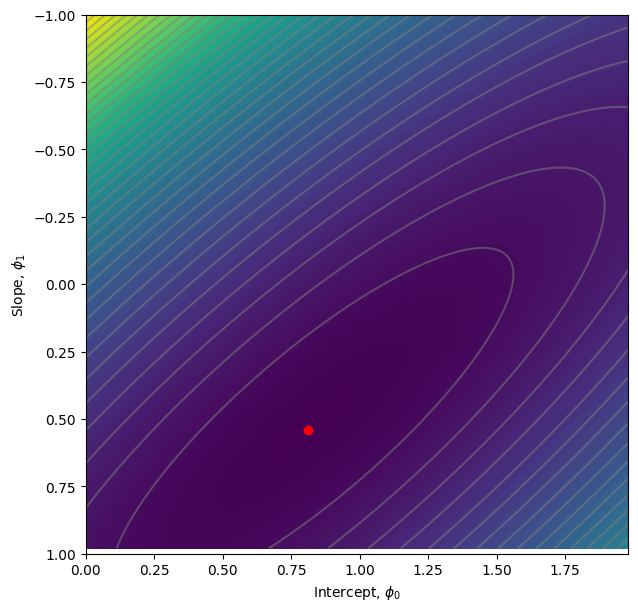

In [38]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()

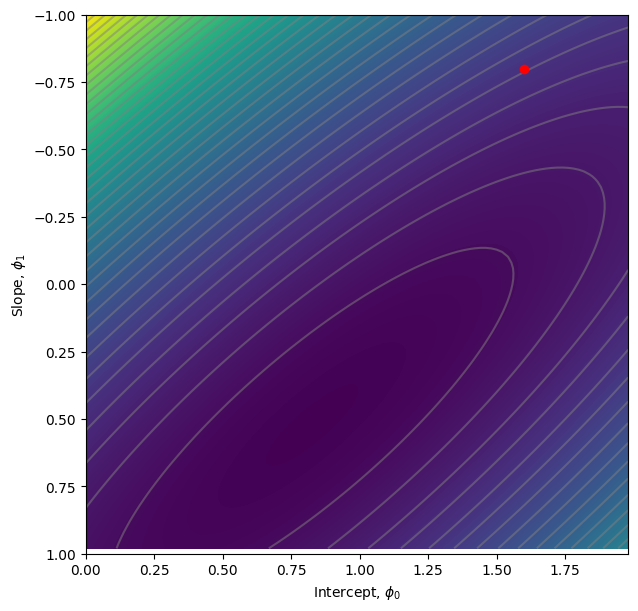

In [40]:
phi0 = 1.60 ; phi1 =-0.8

# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()